In [4]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 3.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp37-cp37m-win_amd64.whl (54 kB)
     ---------------------------------------- 3.3/3.3 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 960.8/960.8 kB 5.1 MB/s eta 0:00:00


In [2]:
# Import Your Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Part 1

### Your Histogram Equalization Function

In [3]:
def hist_equ(image):
    '''
    input:
    image (ndarray): input image
    output:
    output_image (ndarray): enhanced image
    '''

    ############
    # Your code
    # Start
    
    L = 256 # Number of colors
    height = image.shape[0]
    width = image.shape[1]
    n = height * width # Number of pixels
    
    cnt = np.zeros((L,), dtype=int)
    
    for line in image:
        for pixel in line:
            cnt[pixel] += 1
            
    cdf = np.zeros((L,), dtype=int)
    cdf[0] = cnt[0]
    for color in range(1, L):
        cdf[color] = cdf[color - 1] + cnt[color]
    
    equalized_vals = np.rint(cdf * (L - 1) / n).astype(np.int32)
    
    output_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(height):
        for j in range(width):
            output_image[i][j] = equalized_vals[image[i][j]]
    # End
    
    return output_image

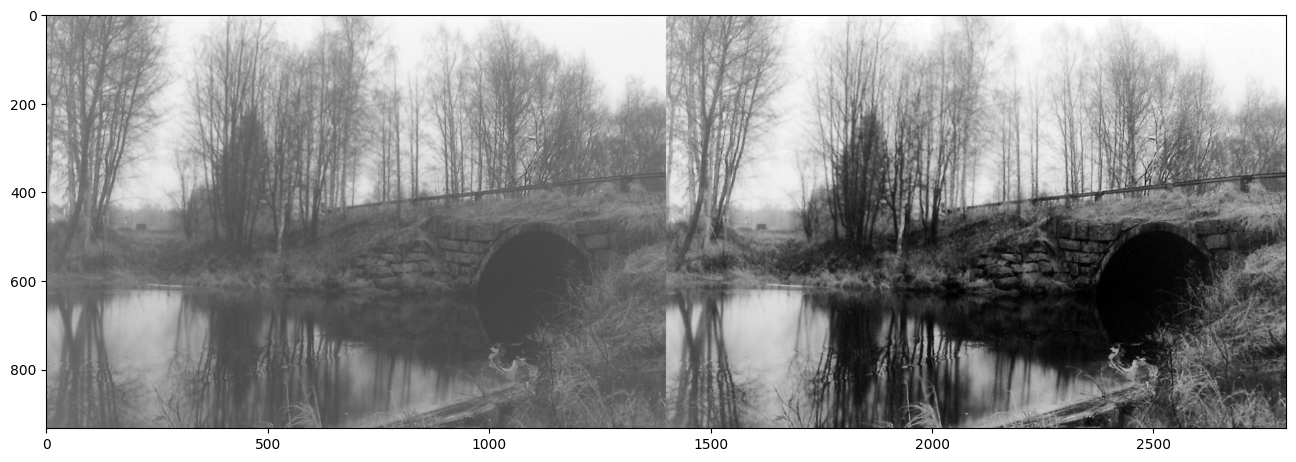

In [4]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
equ = hist_equ(img)
# END

res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

### Histogram Equalization OpenCV Library

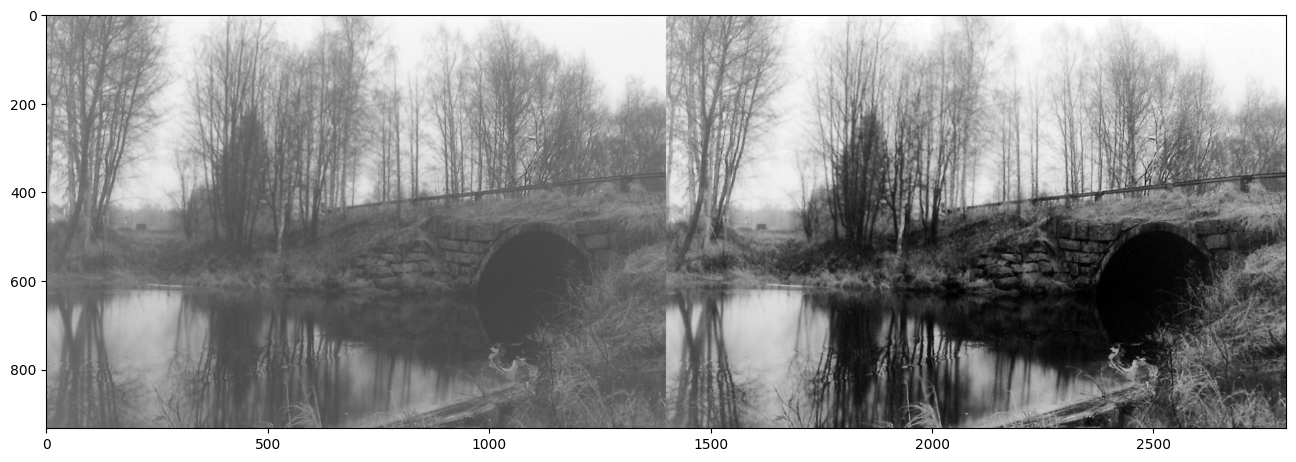

In [5]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
equ = cv2.equalizeHist(img)
# END

res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 2

### CLAHE OpenCV Library

In [6]:
def CLAHE(image, gridSize, clip_limit):
    '''
    inputs:
    image (ndarray): input image
    gridSize (tuple): window size
    clip_limit (int): threshold for contrast limiting
    output:
    output_image (ndarray): improved image
    '''

    ############
    # Your code
    # Start
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=gridSize)
    output_image = clahe.apply(image)
    # End

    return output_image

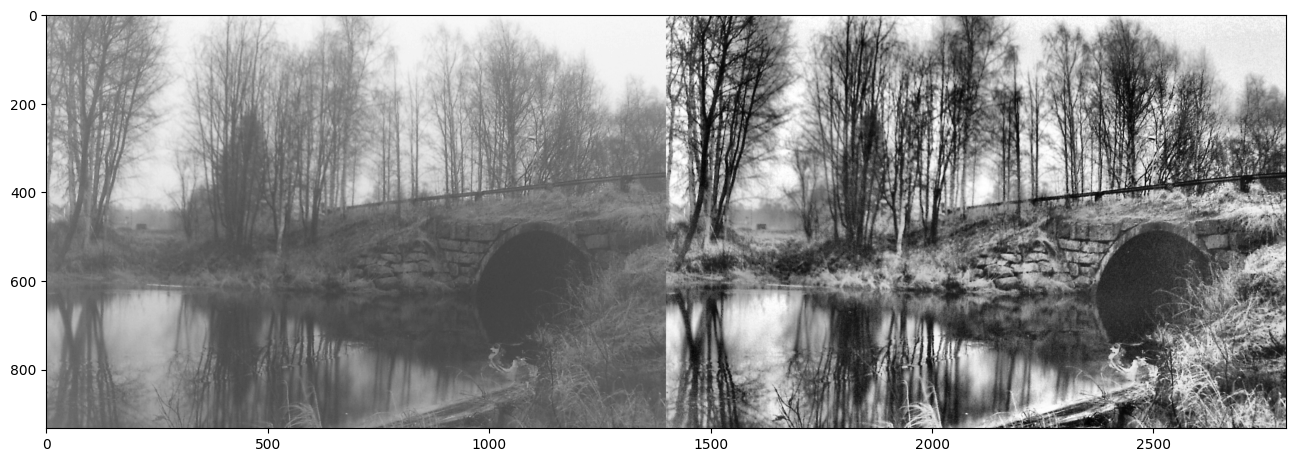

In [7]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
clh = CLAHE(img, (8, 8), 5)
# END

res = np.hstack((img, clh)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 3
Repeat for City image

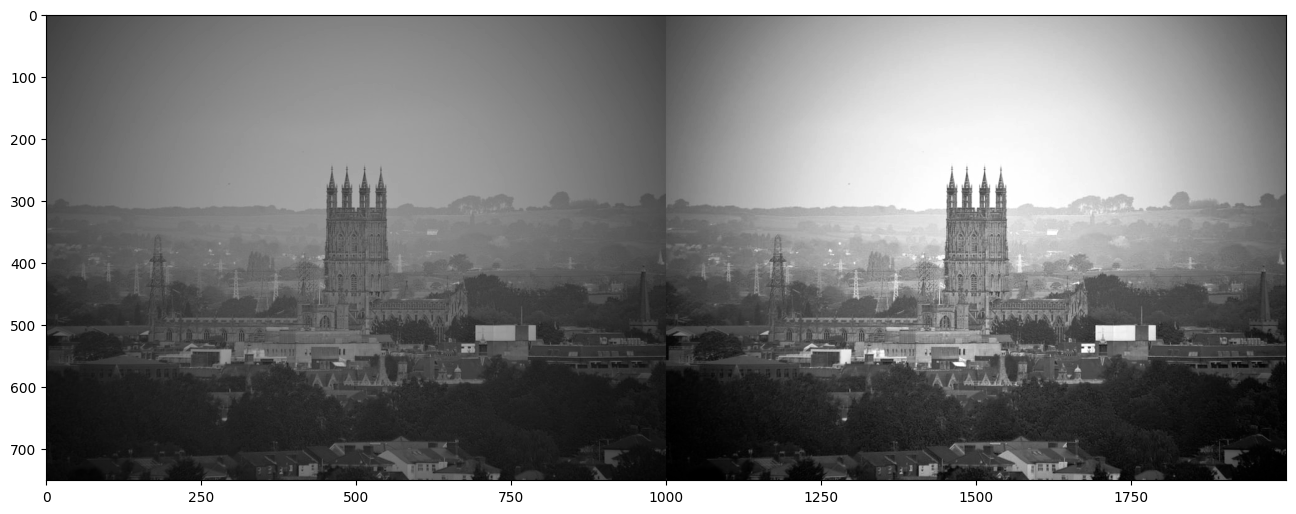

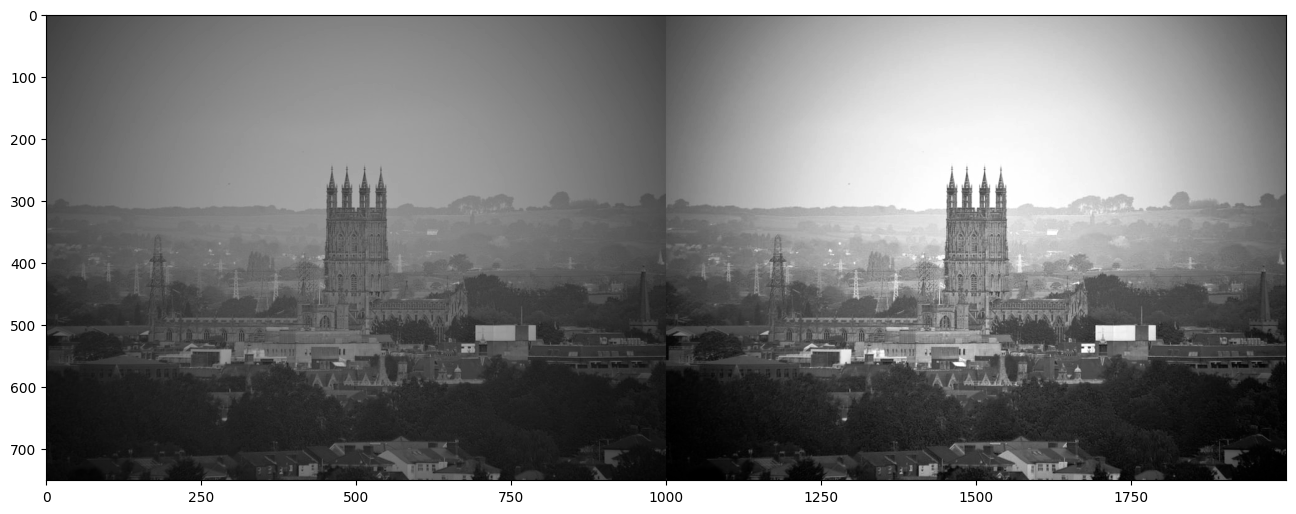

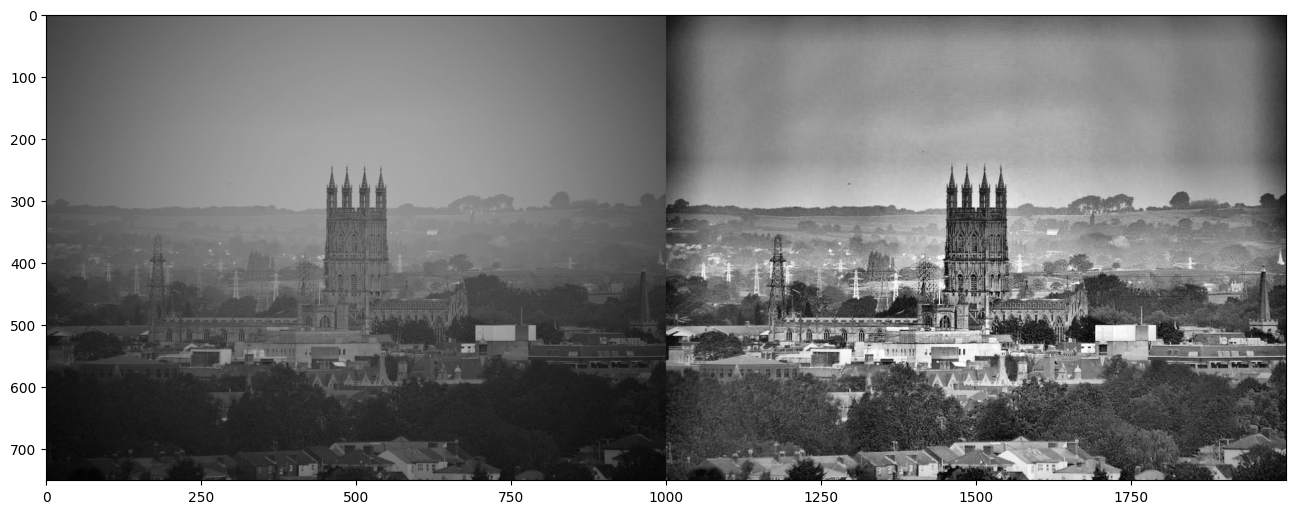

In [8]:
img = cv2.imread('City.jpg', 0)

# Equalization using my own function
equ = hist_equ(img)
res = np.hstack((img, equ))
plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

# Equalization using OpenCV function
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

# Contrast Limited Adaptive Equalization using OpenCV function
clh = CLAHE(img, (8, 8), 5)
res = np.hstack((img, clh)) #stacking images side-by-side
plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')